In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [29]:

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [31]:
measurement_data = engine.execute("SELECT * FROM measurement")
measurement_data.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [32]:
station_data = engine.execute("SELECT * FROM station")
station_data.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

## D1: Determine the Summary Statistics for June

In [40]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date,Measurement.tobs)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs'])
df = df.rename(columns={'tobs': 'Temperature'})
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])


results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
df.set_index(df['tobs'], inplace=True)
#print(df)
df.plot.hist(bins=12)
plt.tight_layout()

In [41]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = df[df['date'].dt.month==6]
june_temps_df = june_df[~np.isnan(june_df['Temperature'])]
print(june_temps_df)


                 date  Temperature
date                              
2010-06-01 2010-06-01         74.0
2010-06-01 2010-06-01         76.0
2010-06-01 2010-06-01         73.0
2010-06-01 2010-06-01         71.0
2010-06-01 2010-06-01         70.0
...               ...          ...
2017-06-30 2017-06-30         74.0
2017-06-30 2017-06-30         81.0
2017-06-30 2017-06-30         74.0
2017-06-30 2017-06-30         75.0
2017-06-30 2017-06-30         76.0

[1700 rows x 2 columns]


In [42]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
print ('June')
print(june_temps_df.describe())

June
       Temperature
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


## D2: Determine the Summary Statistics for December

In [43]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = []
dec_results = session.query(Measurement.date, Measurement.tobs)

In [44]:
# 7. Convert the December temperatures to a list.
dec_df = pd.DataFrame(dec_results, columns=['date','tobs'])
dec_df = dec_df.rename(columns={'tobs': 'Temperature'})
dec_df.set_index(dec_df['Temperature'], inplace=True)

#print(df.to_string(index=False))
# Sort the dataframe by date
dec_df = dec_df.sort_index()
#converting dtype (object) of date dtype to dateime64
dec_df['date'] = pd.to_datetime(dec_df['date'])

In [48]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = dec_df[dec_df['date'].dt.month==12]
dec_temps_df = dec_df[~np.isnan(dec_df['date'])]
print(dec_temps_df)

                  date  Temperature
Temperature                        
56.0        2014-12-31         56.0
56.0        2014-12-31         56.0
57.0        2014-12-31         57.0
57.0        2014-12-29         57.0
58.0        2010-12-07         58.0
...                ...          ...
80.0        2012-12-09         80.0
81.0        2014-12-20         81.0
81.0        2015-12-04         81.0
82.0        2015-12-16         82.0
83.0        2013-12-08         83.0

[1517 rows x 2 columns]


In [49]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print ('December')
print(dec_temps_df.describe())

December
       Temperature
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


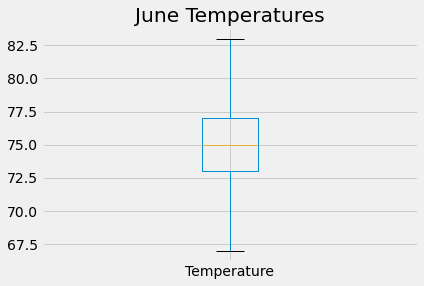

In [51]:
june_temps_df.boxplot(column='Temperature', showfliers=False).set_title('June Temperatures')
plt.show()

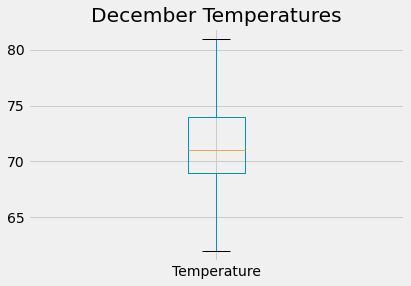

In [16]:
dec_temps_df.boxplot(column='Temperature', showfliers=False).set_title('December Temperatures')
plt.show()